In [1]:
import pandas as pd
import itertools
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

In [2]:
df=pd.read_csv("E:/malicious_phish.csv")

print(df.shape)
df.head()

(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [3]:
import re
#Use of IP or not in domain
#1
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

from urllib.parse import urlparse
#2
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

#pip install googlesearch-python

from googlesearch import search
#3
def google_index(url):
    site = search(url, 5)
    if site:
        return 1  
    else:
        return 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))
#4
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))
#5
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))
#6
def count_atrate(url):
     
    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))

#7
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
#8
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))

#9
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))
#10
def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))
#11
def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))
#12
def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))
#13
def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))
#14
def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))
#15
def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))
#16
def url_length(url):
    return len(str(url))


#Length of URL
df['url_length'] = df['url'].apply(lambda i: url_length(i))
#Hostname Length
#17
def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

df.head()
#18
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

#19
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


df['count-digits']= df['url'].apply(lambda i: digit_count(i))

#20
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

df['count-letters']= df['url'].apply(lambda i: letter_count(i))

# pip install tld
#21
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
#22

def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [86]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df.to_csv('E:datasets/url_features.csv', index=False)

In [87]:
#Predictor Variables
# filtering out google_index as it has only 1 value
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

#Target Variable
y = df['type_code']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [90]:
clf = MLPClassifier(hidden_layer_sizes=(32, 32), activation='relu', solver='adam', max_iter=4500)

In [91]:
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=4500)

In [92]:
y_pred = clf.predict(X_test)

In [93]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
joblib.dump(clf, 'E:/datasets/mlp_model.joblib')
print("Accuracy:", accuracy)
print("Confusion matrix:\n", conf_matrix)

Accuracy: 0.9495773155506415
Confusion matrix:
 [[84199   190    36  1196]
 [  138 18913    58   183]
 [   86   520  5524   374]
 [ 2752   734   300 15036]]


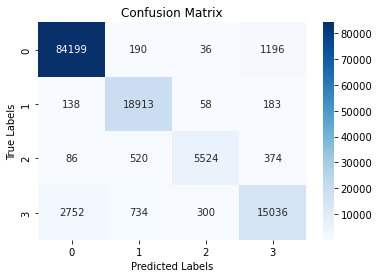

In [94]:
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [95]:
print(classification_report(y_test,y_pred,target_names=['benign', 'defacement','phishing','malware']))

              precision    recall  f1-score   support

      benign       0.97      0.98      0.97     85621
  defacement       0.93      0.98      0.95     19292
    phishing       0.93      0.85      0.89      6504
     malware       0.90      0.80      0.84     18822

    accuracy                           0.95    130239
   macro avg       0.93      0.90      0.92    130239
weighted avg       0.95      0.95      0.95    130239



In [10]:
import joblib

mlp_model = joblib.load("E:\\datasets\\mlp_model.joblib")

def main(url):
    
    status = []
    
    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    #status.append(google_index(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))
    
    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))
    
    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))
    
    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)
    status.append(tld_length(tld))
    status.append(digit_count(url))
    status.append(letter_count(url))
    return status

# predict function 
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    #Due to updates to scikit-learn, we now need a 2D array as a parameter to the predict function.
    print(np.array(features_test).shape)
    features_test=np.array(features_test).reshape(1, -1)
    
    pred = mlp_model.predict(features_test)
    if int(pred[0]) == 0:
        
        res="SAFE"
        return res
    elif int(pred[0]) == 1.0:
        
        res="DEFACEMENT"
        return res
    elif int(pred[0]) == 2.0:
        res="PHISHING"
        return res
        
    elif int(pred[0]) == 3.0:
        
        res="MALWARE"
        return res


# predicting sample raw URLs

urls = ['titaniumcorporate.co.za','en.wikipedia.org/wiki/North_Dakota']

for url in urls:
     print(get_prediction_from_url(url))

(21,)
MALWARE
(21,)
SAFE


In [14]:
import numpy as np
import joblib
from urllib.parse import urlparse
import tldextract
import unicodedata
import re
import idna
from googlesearch import search
import os.path
from tld import get_tld
#1
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
#2
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
#3

#4
def count_dot(url):
    count_dot = url.count('.')
    return count_dot
#5
def count_www(url):
    url.count('www')
    return url.count('www')
#6
def count_atrate(url):
    return url.count('@')
#7
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
#8
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
#9
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
#10
def count_https(url):
    return url.count('https')
#11
def count_http(url):
    return url.count('http')
#12
def count_per(url):
    return url.count('%')
#13
def count_ques(url):
    return url.count('?')
#14
def count_hyphen(url):
    return url.count('-')
#15
def count_equal(url):
    return url.count('=')
#16
def url_length(url):
    return len(str(url))
#17
def hostname_length(url):
    return len(urlparse(url).netloc)
#18
#19
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr', url)
    if match:
        return 1
    else:
        return 0
#20
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
#21
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
#22
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
#23
def tld_length(tld):
    tld = get_tld(url,fail_silently=True)
    try:
        return len(tld)
    except:
        return -1

    return arr
# Load the trained MLP model
mlp_model = joblib.load("E:\\datasets\\mlp_model.joblib")

# Get the user input URL
url = input("Enter a URL to check for maliciousness: ")

def extract_features(url):
    # Initialize feature dictionary
    features =[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    arr = np.array(features)
    #{'having_IP':0,'URL_Length':0,'Shortening_Service':0,}
    parsed_url = urlparse(url)
    path = parsed_url.path
    tld = tldextract.extract(url).domain
           # Extract features using regular expressions
        # Check if URL contains an IP address
    arr[0] =having_ip_address(url)


    arr[1] = abnormal_url(url)

    #arr[2]= google_index(url)


        # Check if URL contains an '@' symbol
    arr[2] = count_dot(url)



    arr[3] = count_www(url)


    arr[4] = count_atrate(url)


        # Extract number of subdomains
    arr[5] = no_of_dir(url)


        # Extract port number
    arr[6] = no_of_embed(url)


        # Extract HTTPS token information
    arr[7] = shortening_service(url)


        # Extract email submission information
    arr[8] = count_https(url)


    arr[9] = count_http(url)

        # Extract abnormal URL information
    arr[10] = count_per(url)


    arr[11] = count_ques(url)


    arr[12] = count_hyphen(url)


    arr[13] =  count_equal(url)


    arr[14] = url_length(url)


    arr[15] = hostname_length(url)

    arr[16] = suspicious_words(url)
    
    arr[17] = fd_length(url)

    arr[] = tld_length(tld)

    arr[21] = digit_count(url)

    arr[22] = letter_count(url)
    return arr



#extract_features(url)
# Extract features from the URL
url_features = extract_features(url)

# Reshape the feature vector for the MLP model
url_features = url_features.reshape(1, -1)

# Use the trained MLP model to predict the class of the input URL
predicted_class = mlp_model.predict(url_features)
print(predicted_class)
# Check if the predicted class is malicious or benign
if predicted_class[0] == 0:
    print("The URL is safe")
elif predicted_class[1] ==1.0:
    print("The URL is Defacement.")
elif predicted_class[0] == 2.0:
    print("The url is phishing")
else:
    print("the url is malicious")
          

Enter a URL to check for maliciousness: titaniumcorporate.co.za


ValueError: X has 22 features, but MLPClassifier is expecting 21 features as input.

In [ ]:
import array
url="www.google.com"
arr=[0]
arr[0] =  count_equal(url)
def count_equal(url):
    return url.count('=')
print(arr[0])